In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Temperature.csv', parse_dates=['dt'])
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             239177 non-null  datetime64[ns]
 1   AverageTemperature             228175 non-null  float64       
 2   AverageTemperatureUncertainty  228175 non-null  float64       
 3   City                           239177 non-null  object        
 4   Country                        239177 non-null  object        
 5   Latitude                       239177 non-null  object        
 6   Longitude                      239177 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 12.8+ MB


In [4]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [5]:
data.isna().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [6]:
data.isna().sum() / data.shape[0] * 100

dt                               0.000000
AverageTemperature               4.599941
AverageTemperatureUncertainty    4.599941
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [7]:
# missing values excluded
data_pre = data.dropna(axis=0,how='any')
data_pre.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [8]:
data_pre.shape

(228175, 7)

In [9]:
data_pre.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [10]:
data_pre['Country'].value_counts()

China                                 34952
India                                 34627
Brazil                                12139
Turkey                                 9239
United States                          8237
Egypt                                  7550
Pakistan                               6490
Russia                                 6332
Canada                                 6282
Nigeria                                5200
Australia                              4138
Japan                                  4050
Colombia                               4003
Saudi Arabia                           3856
Indonesia                              3758
South Africa                           3746
Spain                                  3166
Italy                                  3166
Germany                                3166
United Kingdom                         3166
Ukraine                                3166
France                                 3166
Morocco                         

In [11]:
data_pre['Country'].value_counts().shape

(49,)

In [12]:
data_pre[data_pre['Country']=='Turkey']

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
96617,2013-04-01,16.643,0.337,Izmir,Turkey,37.78N,26.44E
96618,2013-05-01,21.723,0.407,Izmir,Turkey,37.78N,26.44E
96619,2013-06-01,24.416,0.589,Izmir,Turkey,37.78N,26.44E
96620,2013-07-01,26.451,0.277,Izmir,Turkey,37.78N,26.44E


In [13]:
data_pre[(data_pre['Country']=='Turkey') | (data_pre['Country']=='Brazil')]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
198855,2013-04-01,26.651,0.202,Salvador,Brazil,13.66S,38.81W
198856,2013-05-01,25.757,0.548,Salvador,Brazil,13.66S,38.81W
198857,2013-06-01,25.007,0.936,Salvador,Brazil,13.66S,38.81W
198858,2013-07-01,24.419,0.555,Salvador,Brazil,13.66S,38.81W


In [14]:
data_pre[(data_pre['Country']=='Turkey') | (data_pre['AverageTemperature']>20)]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239162,2012-07-01,24.646,1.750,Xian,China,34.56N,108.97E
239163,2012-08-01,23.885,0.435,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E


In [15]:
data_selected = data_pre[data_pre['Country'].isin(['Turkey', 'Brazil', 'Canada'])]
data_selected

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
232924,2013-05-01,13.818,0.278,Toronto,Canada,44.20N,80.50W
232925,2013-06-01,17.367,0.226,Toronto,Canada,44.20N,80.50W
232926,2013-07-01,20.460,0.290,Toronto,Canada,44.20N,80.50W
232927,2013-08-01,18.520,0.342,Toronto,Canada,44.20N,80.50W


In [16]:
# average temperature of selected countries
data_selected.groupby(by='Country').mean()

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Brazil,22.847555,0.877419
Canada,5.109462,1.307818
Turkey,13.790998,1.391654


In [17]:
# max temperature of selected countries
data_selected.groupby(by='Country').max()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude
Country,,,,,,
Brazil,2013-08-01,29.986,5.277,São Paulo,4.02S,47.50W
Canada,2013-09-01,26.164,9.304,Toronto,45.81N,80.50W
Turkey,2013-08-01,29.845,8.459,Izmir,40.99N,33.29E


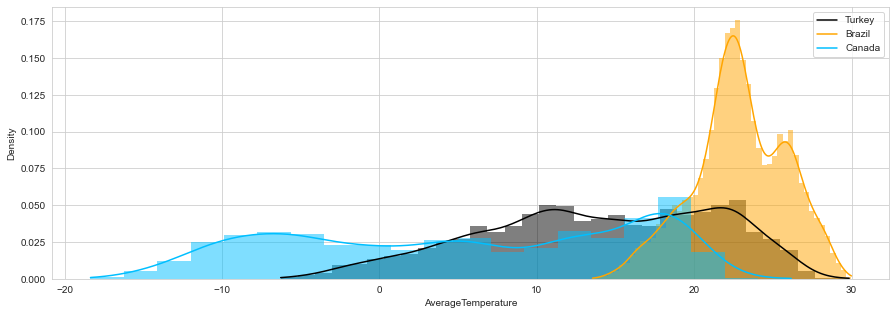

In [18]:
sns.set_style('whitegrid')
countries = data_selected['Country'].unique()
colors = np.array(['black','orange','deepskyblue'])

plt.figure(figsize=(15,5))
for country,color in zip(countries,colors):
    sns.histplot(data_selected[data_selected['Country']==country]['AverageTemperature'], 
                 color=color, kde=True, stat="density", linewidth=0)

plt.legend(countries)
plt.show()

In [19]:
# 20th and 21st century data analysis
tr_data = data_selected[(data_selected['Country']=='Turkey') & (data_selected['dt'] > '1900.01.01')]
tr_data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
13634,1900-02-01,3.339,0.733,Ankara,Turkey,39.38N,33.29E
13635,1900-03-01,4.060,0.708,Ankara,Turkey,39.38N,33.29E
13636,1900-04-01,9.777,0.594,Ankara,Turkey,39.38N,33.29E
13637,1900-05-01,14.301,0.402,Ankara,Turkey,39.38N,33.29E
13638,1900-06-01,17.860,0.509,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
96617,2013-04-01,16.643,0.337,Izmir,Turkey,37.78N,26.44E
96618,2013-05-01,21.723,0.407,Izmir,Turkey,37.78N,26.44E
96619,2013-06-01,24.416,0.589,Izmir,Turkey,37.78N,26.44E
96620,2013-07-01,26.451,0.277,Izmir,Turkey,37.78N,26.44E


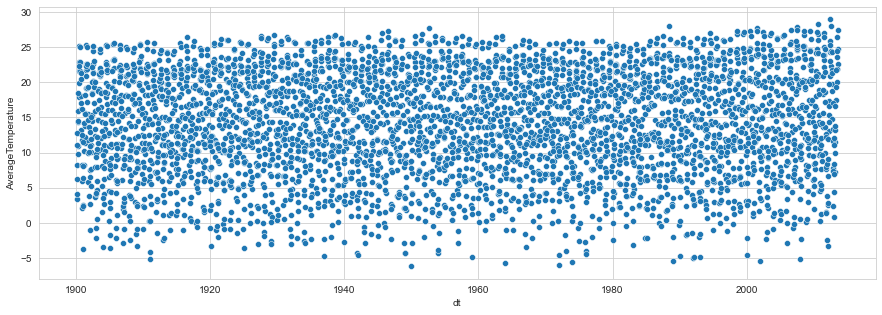

In [20]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='dt',y='AverageTemperature',data=tr_data)
plt.show()

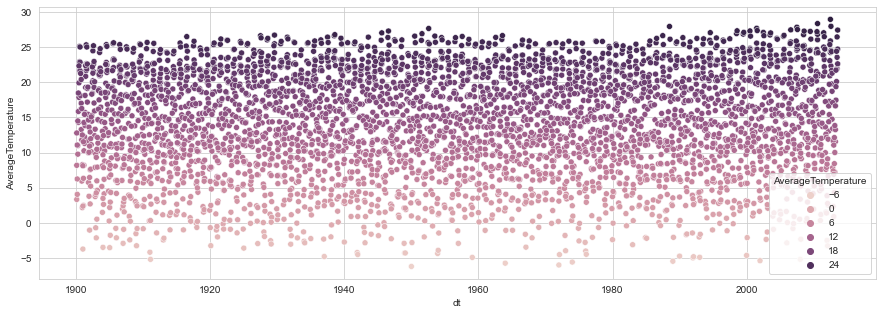

In [21]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='dt',y='AverageTemperature',data=tr_data, hue='AverageTemperature')
plt.show()

In [22]:
tr_data['City'].value_counts()

Ankara      1363
Istanbul    1363
Izmir       1363
Name: City, dtype: int64

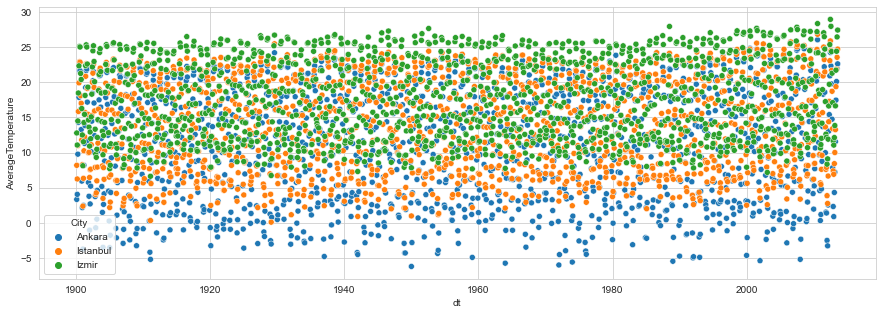

In [23]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='dt',y='AverageTemperature',data=tr_data, hue='City')
plt.show()

In [24]:
tr_data_means = tr_data.groupby(tr_data['dt'].dt.to_period('Y')).mean()
tr_data_means = tr_data_means.reset_index()
tr_data_means['dt'] = tr_data_means['dt'].astype('string').astype('datetime64')
tr_data_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             114 non-null    datetime64[ns]
 1   AverageTemperature             114 non-null    float64       
 2   AverageTemperatureUncertainty  114 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.8 KB


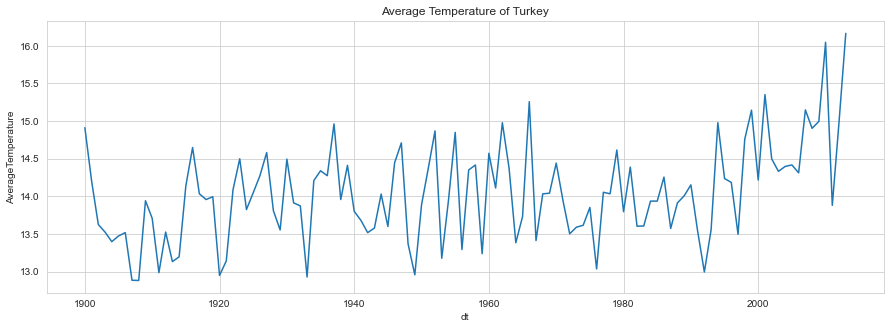

In [25]:
plt.figure(figsize=(15,5))
sns.lineplot(x='dt',y='AverageTemperature',data=tr_data_means)
plt.title('Average Temperature of Turkey', fontsize=12)
plt.show() # Trendline

In [26]:
data_1900 = data_selected[data_selected['dt'] > "01.01.1900"]
data_1900

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
13634,1900-02-01,3.339,0.733,Ankara,Turkey,39.38N,33.29E
13635,1900-03-01,4.060,0.708,Ankara,Turkey,39.38N,33.29E
13636,1900-04-01,9.777,0.594,Ankara,Turkey,39.38N,33.29E
13637,1900-05-01,14.301,0.402,Ankara,Turkey,39.38N,33.29E
13638,1900-06-01,17.860,0.509,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
232924,2013-05-01,13.818,0.278,Toronto,Canada,44.20N,80.50W
232925,2013-06-01,17.367,0.226,Toronto,Canada,44.20N,80.50W
232926,2013-07-01,20.460,0.290,Toronto,Canada,44.20N,80.50W
232927,2013-08-01,18.520,0.342,Toronto,Canada,44.20N,80.50W


In [27]:
data_means = data_1900.groupby(["Country", data_1900['dt'].dt.to_period('Y')]).mean()
data_means = data_means.reset_index()
data_means['dt'] = data_means['dt'].astype('string').astype('datetime64')
data_means

,Country,dt,AverageTemperature,AverageTemperatureUncertainty
0,Brazil,1900-01-01,22.922924,1.216561
1,Brazil,1901-01-01,22.664361,1.084764
2,Brazil,1902-01-01,23.057944,0.891472
3,Brazil,1903-01-01,22.875958,1.031556
4,Brazil,1904-01-01,22.138819,1.147403
...,...,...,...,...
337,Turkey,2009-01-01,14.995611,0.299722
338,Turkey,2010-01-01,16.046583,0.359139
339,Turkey,2011-01-01,13.880333,0.343361
340,Turkey,2012-01-01,14.987417,0.479917


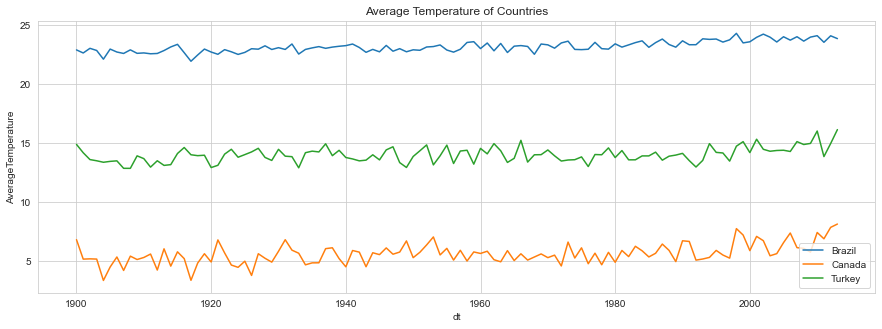

In [28]:
# analysis of selected countries
plt.figure(figsize=(15,5))

for country in data_means['Country'].unique():
    data = data_means[data_means['Country'] == country]
    sns.lineplot(x='dt',y='AverageTemperature',data=data)
plt.legend(data_means['Country'].unique())
plt.title('Average Temperature of Countries', fontsize=12)
plt.show()

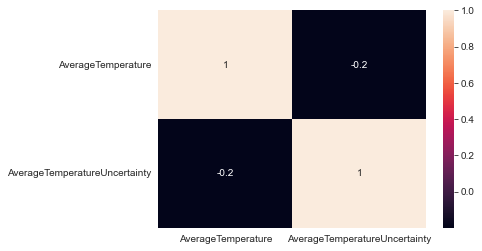

In [29]:
sns.heatmap(data_pre.corr(), annot=True)
plt.show()

In [30]:
outlier_list = []

def find_outlier(data):
    
    list_outlier = []
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    print('Lower bound is ' + str(lower_bound))
    print('Upper bound is ' + str(upper_bound))
    print("Q1: ",Q1)
    print("Q3: ",Q3)
    print("\n")
    
    outliers_vector = (data < (lower_bound)) | (data > (upper_bound))
    outliers = data[outliers_vector]
    
    for i in outliers.index:
        list_outlier.append(i)
    outlier_list = list_outlier
    print("Outlier values indexes: ",outlier_list)

In [31]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,114.000000,114.000000
mean,14.036918,0.432181
std,0.643044,0.147636
min,12.882583,0.251056
25%,13.574931,0.301007
50%,14.000764,0.411722
75%,14.408139,0.544083
max,16.165625,0.814778


## Average Temperature

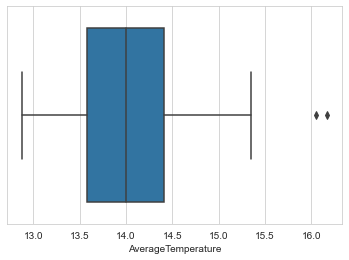

In [32]:
# AverageTemperature outlier values
outlier_avgtemp = data['AverageTemperature']
sns.boxplot(x=outlier_avgtemp)
plt.show()

In [33]:
find_outlier(outlier_avgtemp) # printing outlier values indexes

Lower bound is 12.325118055555556
Upper bound is 15.65795138888889
Q1:  13.574930555555556
Q3:  14.408138888888889


Outlier values indexes:  [338, 341]


## Average Temperature Uncertainty

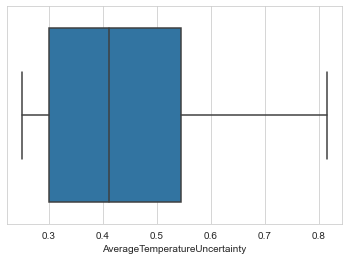

In [34]:
# AverageTemperatureUncertainty outlier values
outlier_avgtempunc = data['AverageTemperatureUncertainty']
sns.boxplot(x=outlier_avgtempunc)
plt.show()

In [35]:
find_outlier(outlier_avgtempunc) # printing outlier values indexes

Lower bound is -0.06360763888888898
Upper bound is 0.9086979166666668
Q1:  0.3010069444444444
Q3:  0.5440833333333334


Outlier values indexes:  []
